# Credit Card Fraud Detection - Support Vector Machines

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
credit_card_data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
credit_card_data = credit_card_data.drop("Time", axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [ ]:
#standard scaling
credit_card_data['std_Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape (-1,1))

#removing Amount
credit_card_data = credit_card_data.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

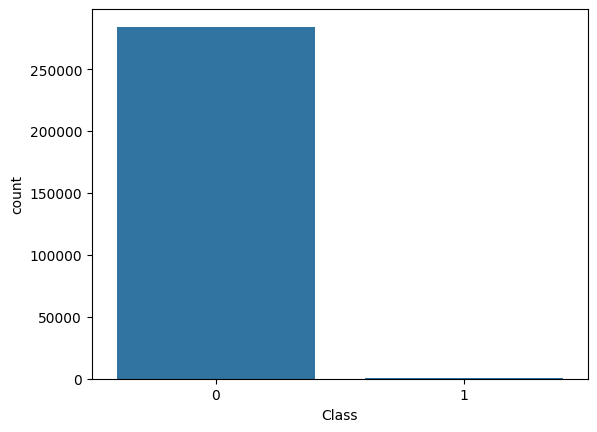

In [ ]:
sns.countplot(x="Class", data=credit_card_data)

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
cols = credit_card_data.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [ ]:
# Check for missing values in the 'Class' column
print(credit_card_data['Class'].isnull().sum())

# If there are missing values, you can either:

# 1. Remove rows with missing values in 'Class'
credit_card_data = credit_card_data.dropna(subset=['Class'])

# 2. Impute missing values with a suitable strategy (e.g., mean, median, mode)
# For example, if 'Class' is a categorical variable, you could use the mode:
credit_card_data['Class'] = credit_card_data['Class'].fillna(credit_card_data['Class'].mode()[0])

# After handling missing values, redefine X and Y and try the undersampling again:
X = credit_card_data[cols]
Y = credit_card_data[target]

X_under, Y_under = undersample.fit_resample(X, Y)
#define X and Y
X = credit_card_data[cols]
Y = credit_card_data[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

0


In [ ]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

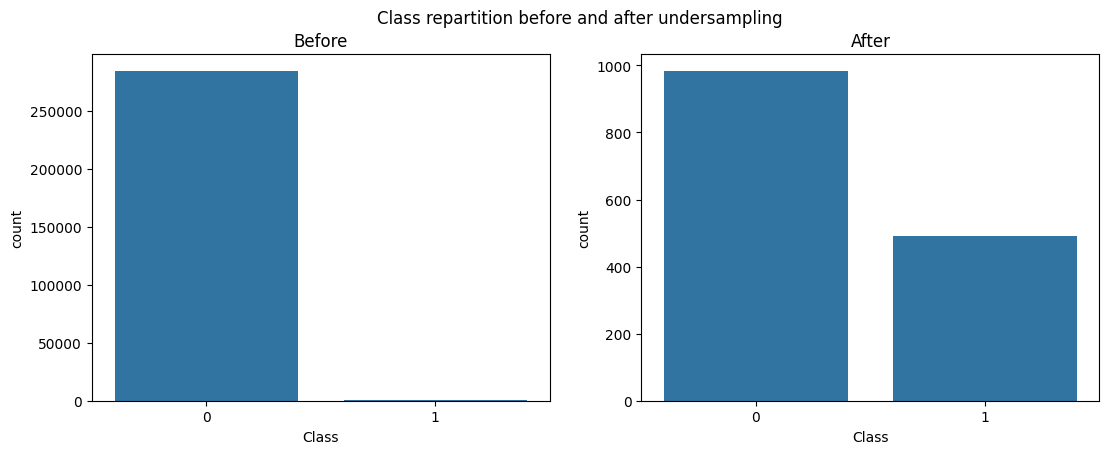

In [ ]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit_card_data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [ ]:
#predictions
y_pred_svm = model2.predict(X_test)

In [ ]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9493243243243243
Precision SVM: 1.0
Recall SVM: 0.8611111111111112
F1 Score SVM: 0.9253731343283582


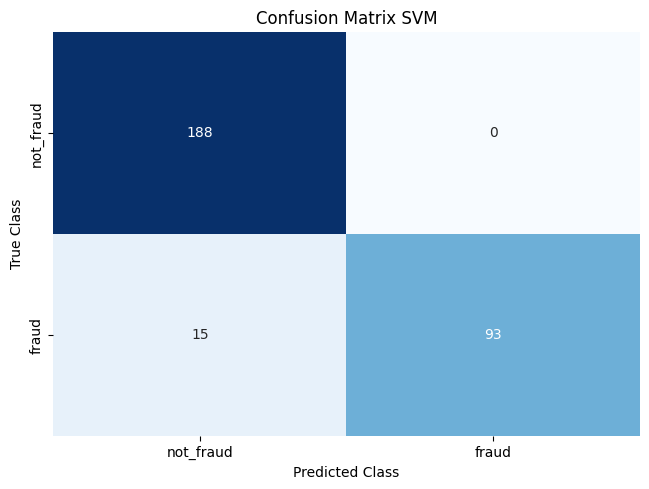

In [ ]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9747340425531915


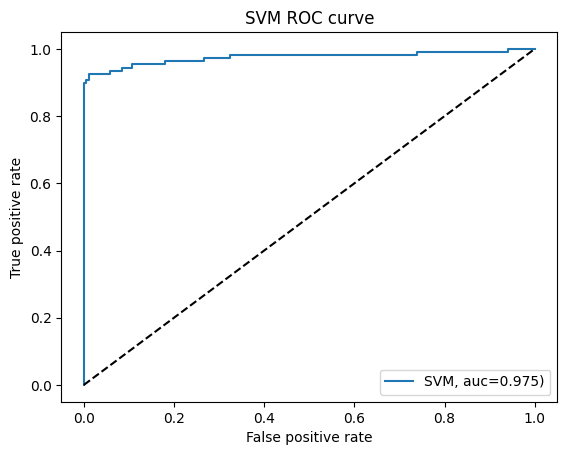

In [ ]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

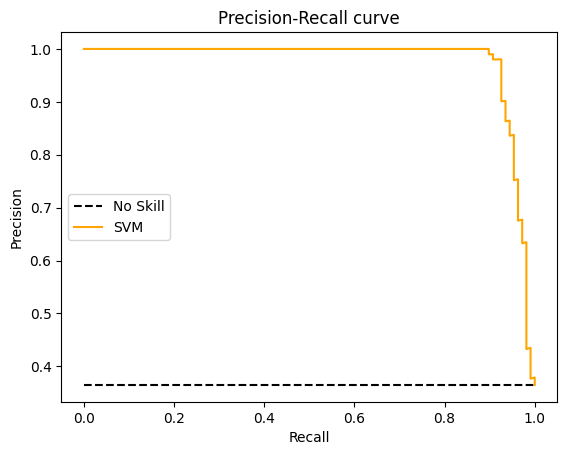

In [ ]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

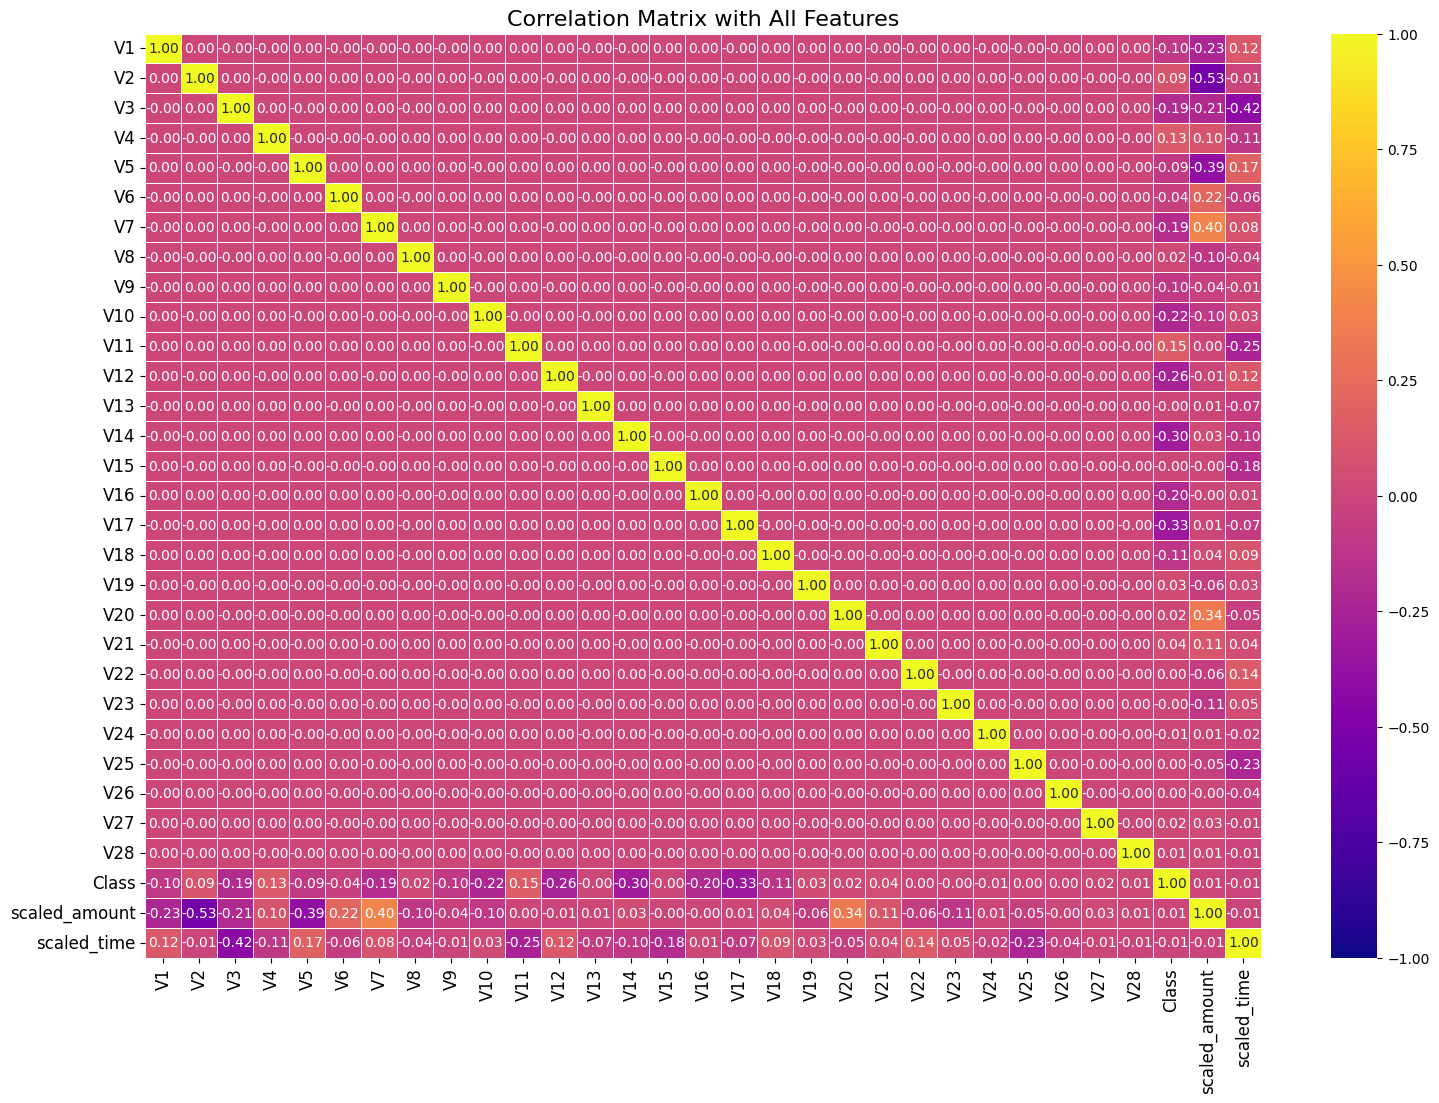

Significant Features (Correlation > 0.1):
 ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Removed Insignificant Features (Correlation <= 0.1):
 ['V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']
Model Accuracy: 98.65%
Response Time: 147.9320 seconds

Confusion Matrix:
 [[56468   282]
 [ 1253 55723]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       0.99      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


Prediction for Fraudulent Transaction:
The transaction is not fraudulent.

Prediction for Non-Fraudulent Transaction:
The transaction is not fraudulent.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import time

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Feature scaling: Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns after scaling
df = df.drop(['Amount', 'Time'], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix with the 'plasma' colormap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix with All Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Define a threshold for selecting significant variables
significant_corr_threshold = 0.1
correlation_with_target = correlation_matrix['Class'].drop('Class')

# Identify significant features based on the threshold
significant_features = correlation_with_target[abs(correlation_with_target) > significant_corr_threshold].index.tolist()
insignificant_features = correlation_with_target[abs(correlation_with_target) <= significant_corr_threshold].index.tolist()

print("Significant Features (Correlation > 0.1):\n", significant_features)
print("\nRemoved Insignificant Features (Correlation <= 0.1):\n", insignificant_features)

# Keep only significant features
df_significant = df[significant_features + ['Class']]

# Define X (features) and y (target)
X = df_significant.drop('Class', axis=1)
y = df_significant['Class']

# Handling the imbalanced dataset using SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model with optimized parameters and measure response time
start_time = time.time()  # Start timer
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)
end_time = time.time()  # End timer

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
response_time = end_time - start_time

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Response Time: {response_time:.4f} seconds")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict for two new transactions (fraudulent and non-fraudulent)

# New fraudulent transaction example
new_data_fraudulent = pd.DataFrame({
    'V1': [1.76321],  'V3': [1.8953], 'V4': [2.564], 'V7': [-1.8954], 'V10': [0.58294],
    'V11': [-1.87654],  'V12': [1.543],  'V14': [-0.56423],  'V16': [0.76435],  'V17': [-1.564],
    'V18': [0.6573], 'scaled_amount': scaler.transform([[800]]).flatten(), 'scaled_time': scaler.transform([[150000]]).flatten()
})

# New non-fraudulent transaction example
new_data_non_fraudulent = pd.DataFrame({
    'V1': [-1.359807],  'V3': [2.536346], 'V4': [1.378155], 'V7': [0.239599], 'V10': [0.090794],
    'V11': [-0.5516],  'V12': [0.415798],  'V14': [0.069083],  'V16': [0.237609],  'V17': [-0.377869],
    'V18': [0.505056], 'scaled_amount': scaler.transform([[123.45]]).flatten(), 'scaled_time': scaler.transform([[10000]]).flatten()
})

# Drop unnecessary columns for prediction (since only significant features are used)
new_data_fraudulent = new_data_fraudulent[significant_features]
new_data_non_fraudulent = new_data_non_fraudulent[significant_features]

# Predict whether the new transactions are fraudulent
prediction_fraudulent = rf_model.predict(new_data_fraudulent)
prediction_non_fraudulent = rf_model.predict(new_data_non_fraudulent)

# Interpret the predictions
print("\nPrediction for Fraudulent Transaction:")
if prediction_fraudulent[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nPrediction for Non-Fraudulent Transaction:")
if prediction_non_fraudulent[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")


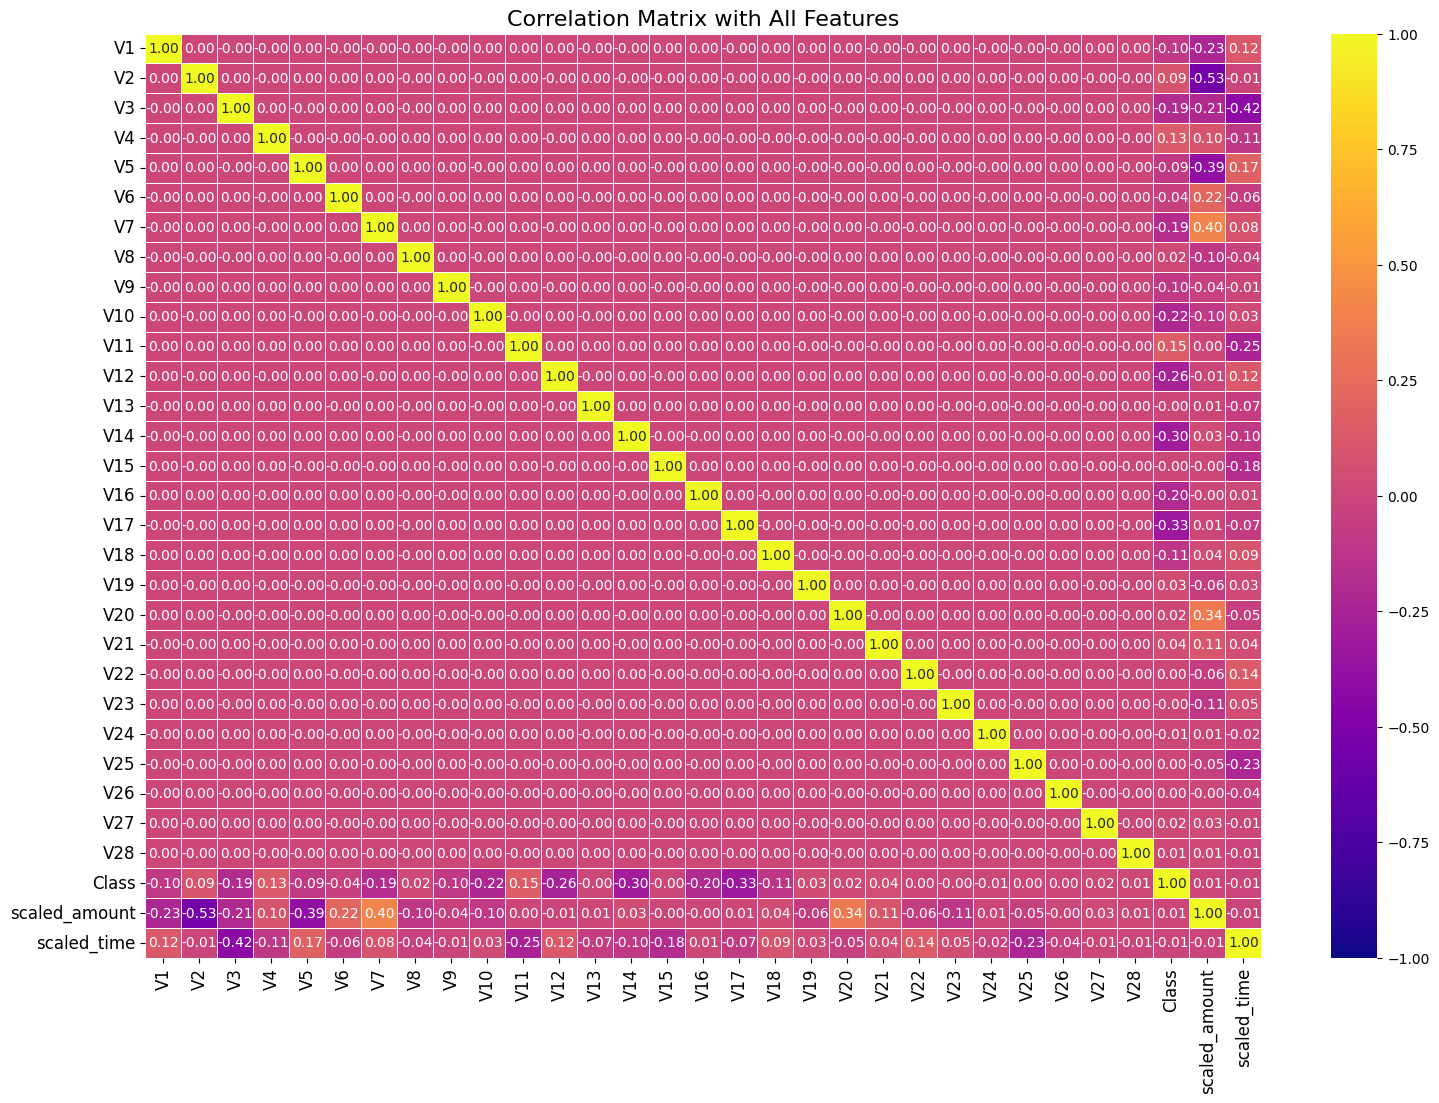

Significant Features (Correlation > 0.1):
 ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Removed Insignificant Features (Correlation <= 0.1):
 ['V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']
Model Accuracy: 98.65%
Response Time for Training: 81.2067 seconds

Confusion Matrix:
 [[56468   282]
 [ 1253 55723]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       0.99      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


Prediction for Fraudulent Transaction with Significant Features:
The transaction is not fraudulent.

Response Time for Significant Features Prediction: 0.0047 seconds

Prediction for Non-Fraudulent Transaction 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import time

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Feature scaling: Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns after scaling
df = df.drop(['Amount', 'Time'], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix with the 'plasma' colormap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix with All Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Define a threshold for selecting significant variables
significant_corr_threshold = 0.1
correlation_with_target = correlation_matrix['Class'].drop('Class')

# Identify significant features based on the threshold
significant_features = correlation_with_target[abs(correlation_with_target) > significant_corr_threshold].index.tolist()
insignificant_features = correlation_with_target[abs(correlation_with_target) <= significant_corr_threshold].index.tolist()

print("Significant Features (Correlation > 0.1):\n", significant_features)
print("\nRemoved Insignificant Features (Correlation <= 0.1):\n", insignificant_features)

# Keep only significant features
df_significant = df[significant_features + ['Class']]

# Check for NaN values
if df_significant.isnull().values.any():
    print("Data contains NaN values. Dropping rows with NaN values...")
    df_significant = df_significant.dropna()  # Drop rows with NaN values

# Define X (features) and y (target)
X = df_significant.drop('Class', axis=1)
y = df_significant['Class']

# Handling the imbalanced dataset using SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model with optimized parameters and measure response time
start_time = time.time()  # Start timer
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)
end_time = time.time()  # End timer

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
response_time = end_time - start_time

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Response Time for Training: {response_time:.4f} seconds")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict for two new transactions (fraudulent and non-fraudulent)

# New fraudulent transaction example
new_data_fraudulent_all = pd.DataFrame({
    'V1': [1.76321], 'V3': [1.8953], 'V4': [2.564], 'V7': [-1.8954], 'V10': [0.58294],
    'V11': [-1.87654], 'V12': [1.543], 'V14': [-0.56423], 'V16': [0.76435], 'V17': [-1.564],
    'V18': [0.6573], 'scaled_amount': scaler.transform([[800]]).flatten(), 'scaled_time': scaler.transform([[150000]]).flatten()
})

# New non-fraudulent transaction example
new_data_non_fraudulent_all = pd.DataFrame({
    'V1': [-1.359807], 'V3': [2.536346], 'V4': [1.378155], 'V7': [0.239599], 'V10': [0.090794],
    'V11': [-0.5516], 'V12': [0.415798], 'V14': [0.069083], 'V16': [0.237609], 'V17': [-0.377869],
    'V18': [0.505056], 'scaled_amount': scaler.transform([[123.45]]).flatten(), 'scaled_time': scaler.transform([[10000]]).flatten()
})

# Drop unnecessary columns for prediction (since only significant features are used)
new_data_fraudulent = new_data_fraudulent_all[significant_features]
new_data_non_fraudulent = new_data_non_fraudulent_all[significant_features]

# Predict for new transactions using only significant features
start_time_significant = time.time()  # Start timer for significant features
prediction_fraudulent_significant = rf_model.predict(new_data_fraudulent)
prediction_non_fraudulent_significant = rf_model.predict(new_data_non_fraudulent)
end_time_significant = time.time()  # End timer for significant features
response_time_significant = end_time_significant - start_time_significant

# Predict for new transactions using only significant features
start_time_significant = time.time()  # Start timer for significant features
prediction_fraudulent_significant = rf_model.predict(new_data_fraudulent)
prediction_non_fraudulent_significant = rf_model.predict(new_data_non_fraudulent)
end_time_significant = time.time()  # End timer for significant features
response_time_significant = end_time_significant - start_time_significant

# Predict for new transactions using all features
# Remove the following lines as they are not necessary for the prediction
# prediction_fraudulent_all = rf_model.predict(new_data_fraudulent_all[significant_features + ['Class']])
# prediction_non_fraudulent_all = rf_model.predict(new_data_non_fraudulent_all[significant_features + ['Class']])

# Instead, just predict using the features of the new data without the 'Class' column
# For new data, use only significant features
start_time_all = time.time()  # Start timer for all features
prediction_fraudulent_all = rf_model.predict(new_data_fraudulent_all[significant_features])
prediction_non_fraudulent_all = rf_model.predict(new_data_non_fraudulent_all[significant_features])
end_time_all = time.time()  # End timer for all features
response_time_all = end_time_all - start_time_all

# Interpret the predictions
print("\nPrediction for Fraudulent Transaction with Significant Features:")
if prediction_fraudulent_significant[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for Significant Features Prediction: {:.4f} seconds".format(response_time_significant))

print("\nPrediction for Non-Fraudulent Transaction with Significant Features:")
if prediction_non_fraudulent_significant[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for Significant Features Prediction: {:.4f} seconds".format(response_time_significant))

print("\nPrediction for Fraudulent Transaction with All Features:")
if prediction_fraudulent_all[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for All Features Prediction: {:.4f} seconds".format(response_time_all))

print("\nPrediction for Non-Fraudulent Transaction with All Features:")
if prediction_non_fraudulent_all[0] == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")

print("\nResponse Time for All Features Prediction: {:.4f} seconds".format(response_time_all))
